Paquetes necesarios

In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

(800, 800, 3)


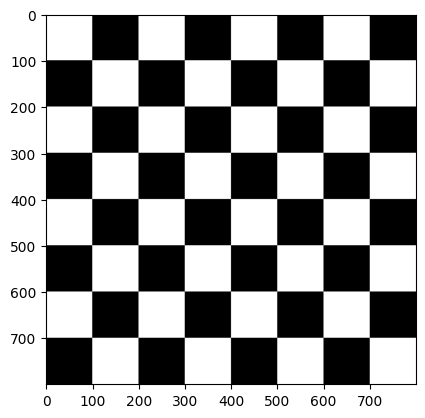

In [2]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
#Dimensiones
for i in range(8):
    for j in range(8):
        if (i+j)%2==0:
            color_img[i*100:(i+1)*100, j*100:(j+1)*100] = 255
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img) 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

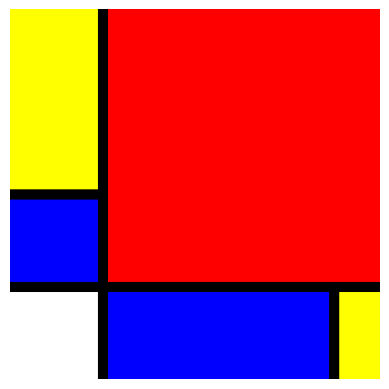

In [5]:
#Dimensiones de la imagen a crear
ancho = 400
alto = 400

# Crear una imagen en blanco (fondo blanco)
mondrian_img = np.full((alto, ancho, 3), 0, dtype=np.uint8)

# Definir colores
blanco = (255, 255, 255)
azul = (255, 0, 0)
amarillo = (0, 255, 255)
rojo = (0, 0, 255)
negro = (0, 0, 0)

# Dibujar los rectángulos de color
cv2.rectangle(mondrian_img, (0, 0), (100, 200), amarillo, -1)  # Amarillo
cv2.rectangle(mondrian_img, (0, 200), (100, 300), azul, -1)    # Azul
cv2.rectangle(mondrian_img, (0, 300), (100, 400), blanco, -1)  # Blanco 
cv2.rectangle(mondrian_img, (100, 0), (400, 300), rojo, -1)    # Rojo 
cv2.rectangle(mondrian_img, (100, 400), (400, 300), azul, -1)    # Azul 
cv2.rectangle(mondrian_img, (350, 400), (400, 300), amarillo, -1)    # Amarillo

# Dibujar líneas negras 
grosor_linea = 10
cv2.line(mondrian_img, (0, 200), (100, 200), negro, grosor_linea)  # Línea horizontal
cv2.line(mondrian_img, (0, 300), (400, 300), negro, grosor_linea)  # Línea horizontal inferior
cv2.line(mondrian_img, (100, 0), (100, 400), negro, grosor_linea)  # Línea vertical derecha
cv2.line(mondrian_img, (350, 300), (350, 400), negro, grosor_linea)  # Línea vertical derecha

# Mostrar la imagen

plt.imshow(cv2.cvtColor(mondrian_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar ejes
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen inspirad en "Separa los tres planos de la imagen captada por la webcam y muestra en horizontal"

In [6]:
# Captura de video desde la cámara
vid = cv2.VideoCapture(0)

while True:
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos los canales
        b = frame[:, :, 0]  
        g = frame[:, :, 1]  
        r = frame[:, :, 2]  
        
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        
        # Modificar los valores de un canal específico
        # Ejemplo: Hacer el canal rojo más brillante
        r = np.clip(r + 100, 0, 255)  # Incrementa los valores del canal de la izquierda en 100, asegurándose de que no se exceda de 255
        
         # Modificar el canal de la izquierda con un umbral
        umbral = 100
        r[r < umbral] = 0  # Establece a 0 los valores del canal rizquierdo que están por debajo del umbral
        
        # Concatenamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))

        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))

    # Detenemos el bucle pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 


In [6]:
# Captura de video desde la cámara
vid = cv2.VideoCapture(0)


while True:
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Convertir a escala de grises para encontrar los valores más claros y oscuros
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encuentra el índice del valor máximo y mínimo
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

        # Dibuja un círculo en el píxel más oscuro
        cv2.circle(frame, min_loc, 10, (0, 0, 255), 2)  # Rojo para el más oscuro

        # Dibuja un círculo en el píxel más claro
        cv2.circle(frame, max_loc, 10, (255, 0, 0), 2)  # Azul para el más claro
         
        cv2.imshow('Cam', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [7]:
# Captura de video desde la cámara
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Reducir resolución a bloques de 8x8 para encontrar las zonas más claras y oscuras
        small_gray = cv2.resize(gray, (gray.shape[1] // 8, gray.shape[0] // 8))

        # Encontrar los valores mínimo y máximo en la imagen reducida
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(small_gray)

        # Escalar las coordenadas a la imagen original
        min_loc = (min_loc[0] * 8, min_loc[1] * 8)
        max_loc = (max_loc[0] * 8, max_loc[1] * 8)

        # Dibujar círculos en las zonas más clara y oscura
        cv2.circle(frame, min_loc, 10, (0, 0, 255), 2)  # Rojo para el más oscuro
        cv2.circle(frame, max_loc, 10, (255, 0, 0), 2)  # Azul para el más claro

        # Mostrar la imagen con los círculos
        cv2.imshow('Cam', frame)

    if cv2.waitKey(20) == 27:  # Detener con ESC
        break
    
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Llevar a cabo una propuesta propia de pop art

In [13]:
#Capturar video desde la cámara
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)  # En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)  # Crear el collage vacío

while True:
    # Captura fotograma a fotograma
    ret, frameIN = vid.read()

    if ret:
        # Redimensionar el frame a la mitad de su tamaño
        frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

        # Asignar cada frame redimensionado a una sección del collage
        collage[0:h, 0:w] = frame  # Cuadrante superior izquierdo
        collage[0:h, w:w + w] = cv2.bitwise_not(frame)  # Cuadrante superior derecho (invertido)

        # Convertir a escala de grises y luego de nuevo a BGR para poder asignarlo
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        collage[h:h + h, 0:w] = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Cuadrante inferior izquierdo (gris)

        # Aplicar un mapa de color al frame original
        collage[h:h + h, w:w + w] = cv2.applyColorMap(frame, cv2.COLORMAP_JET)  # Cuadrante inferior derecho (color map)

        # Mostrar la composición en la ventana
        cv2.imshow('Cam', collage)

    # Detenemos pulsando la tecla ESC
    if cv2.waitKey(20) == 27:
        break

#Liberar la cámara
vid.release()
#Cerrar todas las ventanas
cv2.destroyAllWindows()